<a href="https://colab.research.google.com/github/Samenergy/Formative-1-Databases/blob/main/Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, regularizers
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

In [ ]:
# Loading the data from a CSV file
data = pd.read_csv('loan_data.csv')


# Displaying the first few rows of the data
data.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [ ]:
# Preprocessing the data
label_encoder = LabelEncoder()
categorical_columns = ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file', 'loan_status']
for col in categorical_columns:
   data[col] = label_encoder.fit_transform(data[col])

In [ ]:
# Separating the features (X) and target (y)
X = data.drop(columns=['loan_status'])
y = data['loan_status']


# Applying SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [ ]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


# Normalizing the features
X_train = X_train / X_train.max()
X_test = X_test / X_test.max()


 # defining and compiling the model

In [ ]:
# Function to define and compile the model
def define_model(optimizer='adam', regularization=None, early_stopping=False, dropout=0.5, learning_rate=0.001):
   model = tf.keras.Sequential()
   reg = None if regularization is None else regularizers.l2(regularization)
 # Input layer and first hidden layer
   model.add(layers.Dense(64, activation='relu', input_dim=X_train.shape[1], kernel_regularizer=reg))
   model.add(layers.Dropout(dropout))

   # Second hidden layer
   model.add(layers.Dense(32, activation='relu', kernel_regularizer=reg))
   model.add(layers.Dropout(dropout))

   # Output layer
   model.add(layers.Dense(1, activation='sigmoid'))

   # Choosing optimizer
   if optimizer == 'adam':
       optimizer = Adam(learning_rate=learning_rate)
   elif optimizer == 'rmsprop':
       optimizer = RMSprop(learning_rate=learning_rate)
   else:
       optimizer = Adam(learning_rate=learning_rate)

   model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

   # Callbacks
   callbacks = [EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)] if early_stopping else []

   history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test), callbacks=callbacks)
   return model, history


# Function to plot loss curves


In [ ]:
# Function to plot loss curves
def loss_curve_plot(history):
   plt.figure(figsize=(12, 6))
   plt.plot(history.history['loss'], 'bo', label='Training loss')
   plt.plot(history.history['val_loss'], 'r', label='Validation loss')
   plt.title('Training and Validation Loss')
   plt.xlabel('Epochs')
   plt.ylabel('Loss')
   plt.legend()
   plt.show()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7895 - loss: 0.6287 - val_accuracy: 0.8829 - val_loss: 0.3367
Epoch 2/30
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8714 - loss: 0.3535 - val_accuracy: 0.8794 - val_loss: 0.3183
Epoch 3/30
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8723 - loss: 0.3433 - val_accuracy: 0.8868 - val_loss: 0.3081
Epoch 4/30
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8712 - loss: 0.3358 - val_accuracy: 0.8872 - val_loss: 0.3055
Epoch 5/30
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8770 - loss: 0.3259 - val_accuracy: 0.8860 - val_loss: 0.2995
Epoch 6/30
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8745 - loss: 0.3250 - val_accuracy: 0.8864 - val_loss: 0.2969
Epoch 7/30
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8752 - loss: 0.3185 - val_accuracy: 0.8852 - val_loss: 0.2963
Epoch 8/30
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8746 - loss: 0.3192 

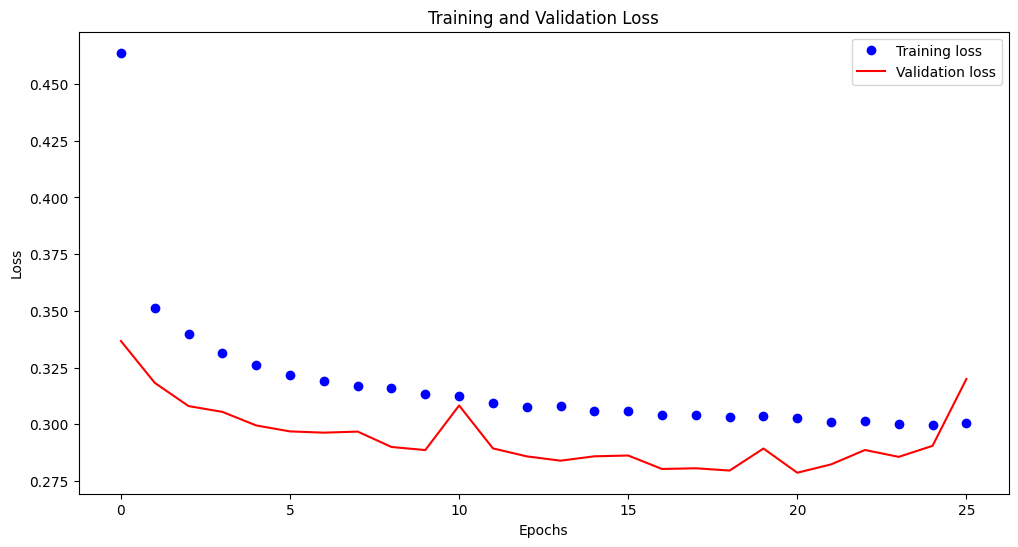

In [ ]:
# Model 2: Adam optimizer with L2 regularization
model_2, history_2 = define_model(optimizer='adam', regularization=0.01, early_stopping=True, dropout=0.5, learning_rate=0.001)
loss_curve_plot(history_2)

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1750/1750 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8336 - loss: 0.3693 - val_accuracy: 0.8771 - val_loss: 0.2746
Epoch 2/30
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8840 - loss: 0.2643 - val_accuracy: 0.8775 - val_loss: 0.2683
Epoch 3/30
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8908 - loss: 0.2499 - val_accuracy: 0.8756 - val_loss: 0.2693
Epoch 4/30
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8936 - loss: 0.2431 - val_accuracy: 0.8944 - val_loss: 0.2426
Epoch 5/30
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8956 - loss: 0.2398 - val_accuracy: 0.8905 - val_loss: 0.2522
Epoch 6/30
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8987 - loss: 0.2371 - val_accuracy: 0.8889 - val_loss: 0.2492
Epoch 7/30
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9003 - loss: 0.2300 - val_accuracy: 0.8968 - val_loss: 0.2462
Epoch 8/30
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8977 - loss: 0.2340 - val_accur

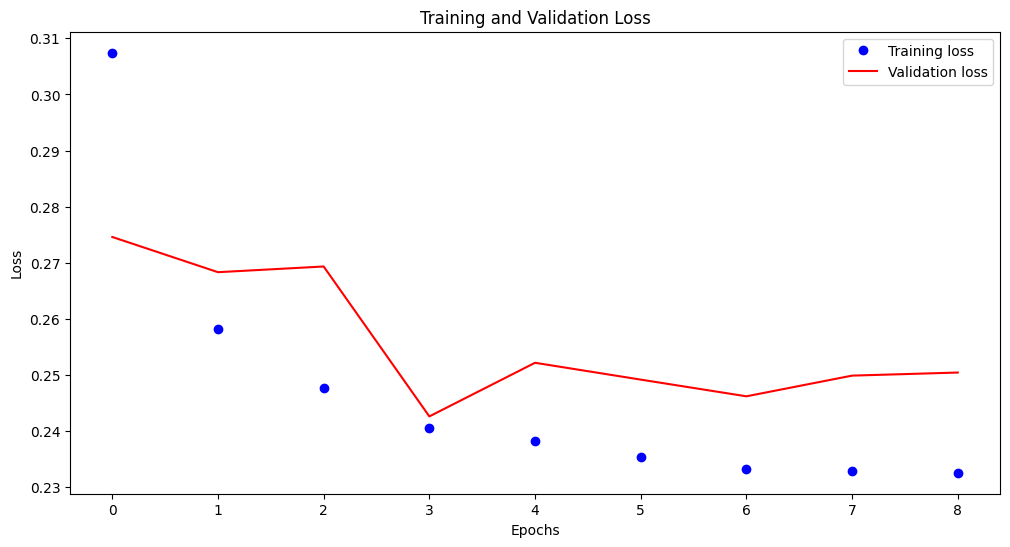

In [ ]:
# Model 3: RMSprop optimizer with no regularization
model_3, history_3 = define_model(optimizer='rmsprop', regularization=None, early_stopping=True, dropout=0.3, learning_rate=0.001)
loss_curve_plot(history_3)

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1750/1750 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8160 - loss: 0.5788 - val_accuracy: 0.8840 - val_loss: 0.3305
Epoch 2/30
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8746 - loss: 0.3384 - val_accuracy: 0.8864 - val_loss: 0.3033
Epoch 3/30
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8813 - loss: 0.3136 - val_accuracy: 0.8893 - val_loss: 0.2945
Epoch 4/30
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8830 - loss: 0.3054 - val_accuracy: 0.8862 - val_loss: 0.2938
Epoch 5/30
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8827 - loss: 0.3007 - val_accuracy: 0.8843 - val_loss: 0.2961
Epoch 6/30
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8792 - loss: 0.2998 - val_accuracy: 0.8883 - val_loss: 0.2839
Epoch 7/30
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8828 - loss: 0.2953 - val_accuracy: 0.8884 - val_loss: 0.2789
Epoch 8/30
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8848 - loss: 0.2904 - val_accura

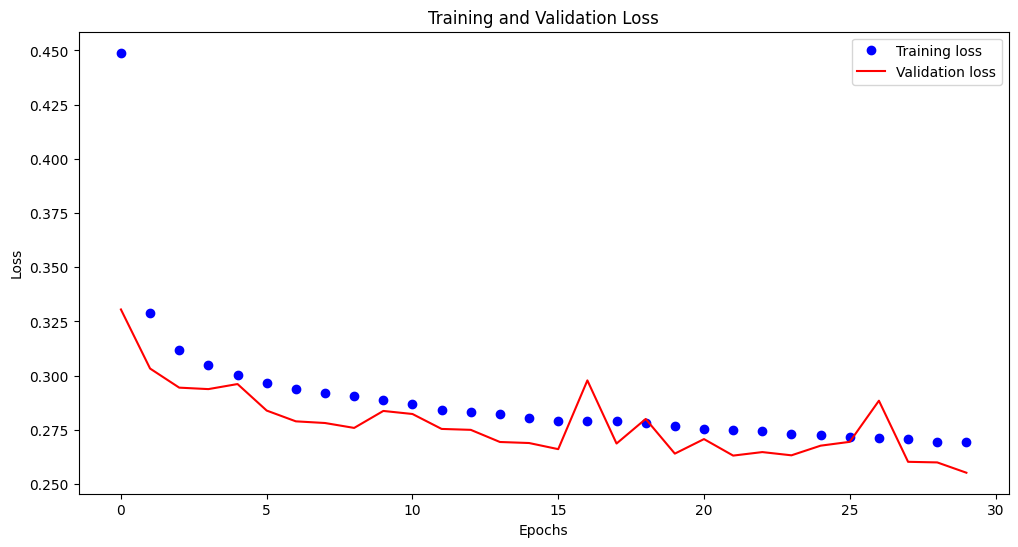

In [ ]:
# Model 4: Adam optimizer with different dropout rate
model_4, history_4 = define_model(optimizer='adam', regularization=0.005, early_stopping=False, dropout=0.3, learning_rate=0.0005)
loss_curve_plot(history_4)